# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [8]:
df = pd.read_csv('base.csv', sep = ',')
df.head()

,Unnamed: 0,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,58.832877,3.106849,1,0,0,0,2.0,False,...,1,1,0,0,0,1,0,0,0,0
1,1,0,52.356164,8.358904,1,0,1,1,1.0,False,...,1,0,0,1,0,1,0,0,0,0
2,2,0,52.356164,8.358904,1,0,1,1,1.0,False,...,1,0,0,1,0,1,0,0,0,0
3,3,0,46.224658,2.106849,1,1,1,1,2.0,False,...,0,1,0,0,0,1,0,0,0,0
4,4,0,29.230137,3.021918,1,0,0,0,2.0,False,...,0,1,0,0,0,1,0,0,0,0


In [9]:
df.mau = df.mau.astype(int)
df.dtypes

Unnamed: 0                                  int64
qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                         int32
sexo_M                                      int64
posse_de_veiculo_Y                          int64
posse_de_imovel_Y                           int64
tipo_renda_Pensioner                        int64
tipo_renda_State servant                    int64
tipo_renda_Student                          int64
tipo_renda_Working                          int64
educacao_Higher education                   int64
educacao_Incomplete higher                  int64
educacao_Lower secondary                    int64


In [10]:
df.mau.value_counts()

0    16260
1      390
Name: mau, dtype: int64

In [11]:
mau = df.mau
df_sem_mau = df.drop('mau', axis = 1)

In [12]:
df_sem_mau_treino, df_sem_mau_teste, mau_treino, mau_teste = train_test_split(df_sem_mau, mau, test_size = 0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [13]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(df_sem_mau_treino,mau_treino)

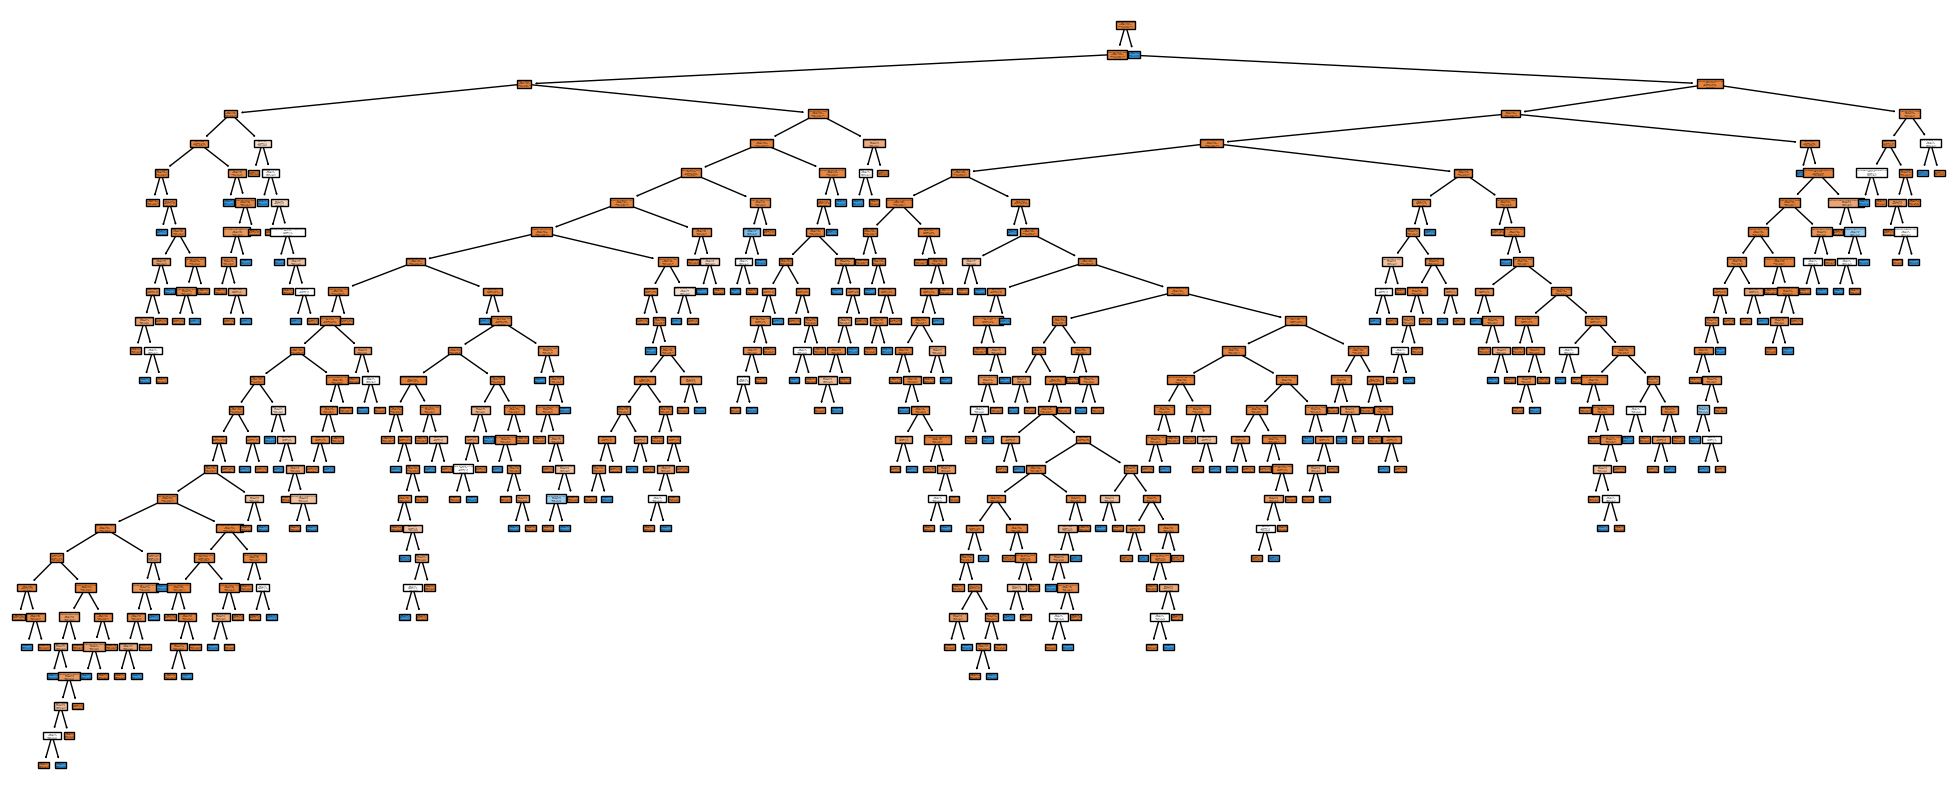

In [14]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['Mau', 'Bom'],
          feature_names=df_sem_mau.columns);

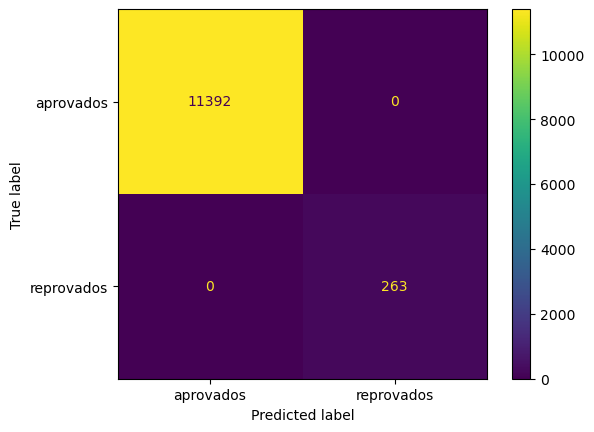

In [17]:
ConfusionMatrixDisplay.from_estimator(clf, df_sem_mau_treino, mau_treino, display_labels=['aprovados', 'reprovados']);

In [47]:
previsao_treino = clf.predict(df_sem_mau_treino)
acuracia_treino = accuracy_score(mau_treino, previsao_treino)
print(acuracia_treino)

1.0


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

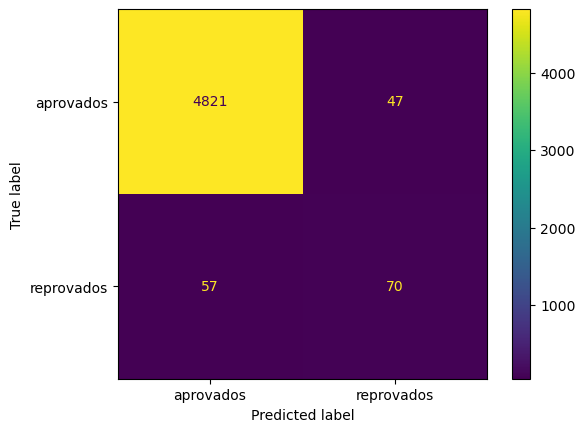

In [18]:
ConfusionMatrixDisplay.from_estimator(clf, df_sem_mau_teste, mau_teste, display_labels=['aprovados', 'reprovados']);

In [48]:
previsao_teste = clf.predict(df_sem_mau_teste)
acuracia_teste = accuracy_score(mau_teste, previsao_teste)
print(acuracia_teste)

0.9791791791791792


In [50]:
print(f'A acurácia da base de treino é: {acuracia_treino}')
print(f'A acurácia da base de teste é: {acuracia_teste}')
print(f'A base de treino possui uma acurácia de {acuracia_treino/acuracia_teste -1} maior quando comparada a acurácia da base de teste')

A acurácia da base de treino é: 1.0
A acurácia da base de teste é: 0.9791791791791792
A base de treino possui uma acurácia de 0.021263545287262264 maior quando comparada a acurácia da base de teste


In [51]:
clf_podada = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5 ,random_state=123)
clf_podada = clf_podada.fit(df_sem_mau_teste,mau_teste)

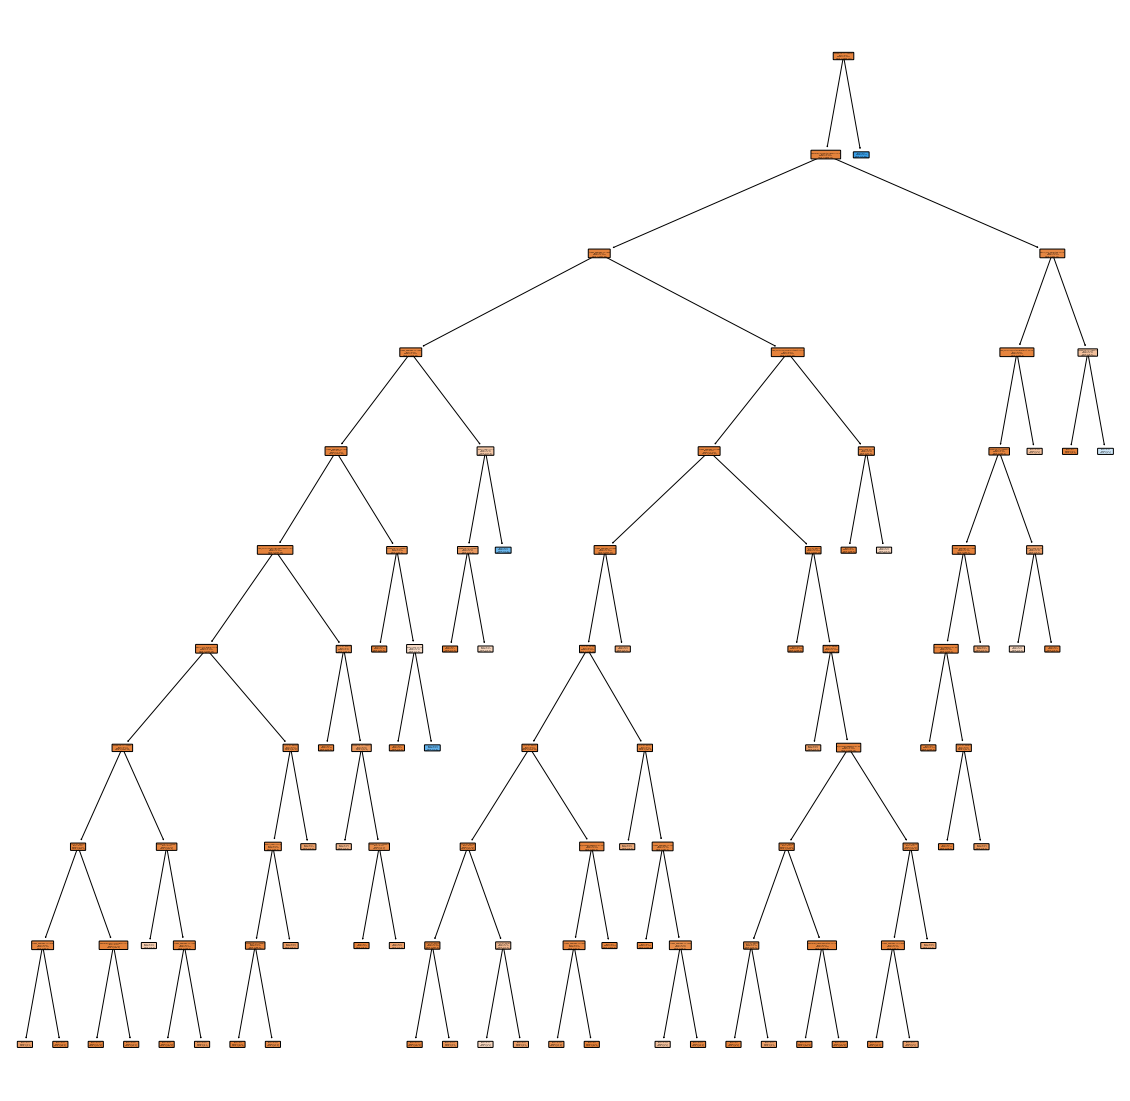

In [53]:
plt.figure(figsize=[20,20])
plot_tree(clf_podada,
         filled=True,
         rounded=True,
         class_names=['aprovados', 'reprovados'],
         feature_names=df_sem_mau_teste.columns);

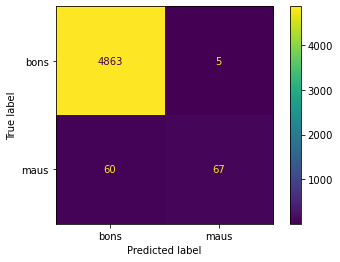

In [54]:
ConfusionMatrixDisplay.from_estimator(clf_podada, df_sem_mau_teste, mau_teste, display_labels=['bons', 'maus']);

In [55]:
print(f'Foi classificado como maus {67/(4863 + 60 + 5 + 67)}')

Foi classificado como maus 0.01359577922077922


In [61]:
mau_teste = mau_teste.replace(1, 0)
mau_teste.value_counts()

0    4995
Name: mau, dtype: int64

In [62]:
previsao_teste = clf.predict(df_sem_mau_teste)
acuracia_teste = accuracy_score(mau_teste, previsao_teste)
print(acuracia_teste)

0.9765765765765766


A acurácia iria sofrer pouca variação: 

antes - 0,979     
depois - 0,976